<a href="https://colab.research.google.com/github/SeamusHerrod/EECS-645-Computer-Architecture/blob/main/EECS_645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>**MIPS Instruction Set Architecture**

##Arithmetic Operations:

Addition Example
>A = B + C 
> 
>All operands (A, B, C) in Memory

**<center>0-Operand ISA** -> Stack m/cs</center>

```

push B # [TOS] <- MEM[B] read takes one cycle, write take 1 cycle, 2 total 

push C # [TOS] <- MEM[C] 2 cycles 

add    # [TOS] <- [TOS - 1] + [TOS - 2] 2 reads and 1 cycle for addition, 1 cycle for the write, 4 cycles 

pop A  # MEM[A] <- [TOS] 2 cycles 
 
pop C  # MEM[C] <- [TOS] 2 cycles 
```

5 instructions, 12 cycles, CPU bound by memory, no copies of operands in CPU

$CPI = 12/5 = 2.4$

**<center>1-operand ISA**</center>

MDR = Memory Data Register - MDR is INSIDE the CPU, which is why it doesn't take any cycles to read/write to MDR
MBR = Memory Buffer Register

```
load B  # MDR <- MEM[B] read B, no cycle for read into MDR 1 cycle

add C   # MDR <- MDR + MEM[C] read C, add to MDR, 2 cycle

store A # MEM[A] <- MDR write MDR to MEM, 1 cycle 
```
3 instructions, 4 cycles, CPU bound by memory, a copy of only A in CPU

$CPI = 4/3 = 1.33$

**<center>2-Operand ISA**</center>
**CISC (Complex Instruction Set Computer)**
```
move A, B  # MEM[A] <- MEM[B]

add A, C   # MEM[A] <- MEM[A] + MEM[C]
```
2 instructions, 6 cycles, CPU bound by memory, no copies of operands in CPU

**RISC (Reduced Instruction Set Computer)**
- register files are IN the CPU, so it takes 0 clock cycles to 

```
load r1, B   # R[r1]  <- MEM[B] 1 cycle 

load r2, C   # R[r2]  <- MEM[C] 1 cycle 

add r2, r1   # R[r2]  <- R[r2] + R[r1] 1 cycle 

store A, r2  # MEM[A] <- R[r2] 1 cycle
```

4 instruction, 4 cycles, CPU **UNBOUND** by memory, a copy of A and (B or C) in CPU

**<center>3-Operand ISA**</center>
**CISC**

```
add A, B, C   # MEM[A] <- MEM[B] + MEM[C] 2 reads, 1 addition, 1 write
```

1 instruction, 4 cycles, CPU bound by memory, no copies of operands in CPU

**RISC**

```
load r1, B       # R[r1] <- MEM[B]

load r2, C       # R[r2] <- MEM[C]

add r3, r2, r1   # R[r3] <- R[r2] + R[r1]

store A, r3      # MEM[A] <- R[r3]
```

4 instructions, 4 cycles, CPU **UNBOUND** by memory, a copy of **ALL** operands in CPU

##CPU Register file:

So how can this reading and writing from the CPU register file be so fast, 

Typical RAM is single-port memory, meaning exactly 1 data access/change can happen at once 
  - cannot read and write within one clock cycle 

the Register file in the CPU is 3-ported memory, 2 for reading and 1 for writing; meaning that 2 reads and 1 write can happen every cycle

##<center>**MIPS Arithmetic Operations:**

* Add and subtract, three operands
  * Two sources and one destination

MIPS has 32 x 32-bit register file
  * Used for frequently accessed data
  * Numbered 0 to 31
  * 32-bit data called "word"

Assembler Names: 

Naming Convention for MIPS Registers:

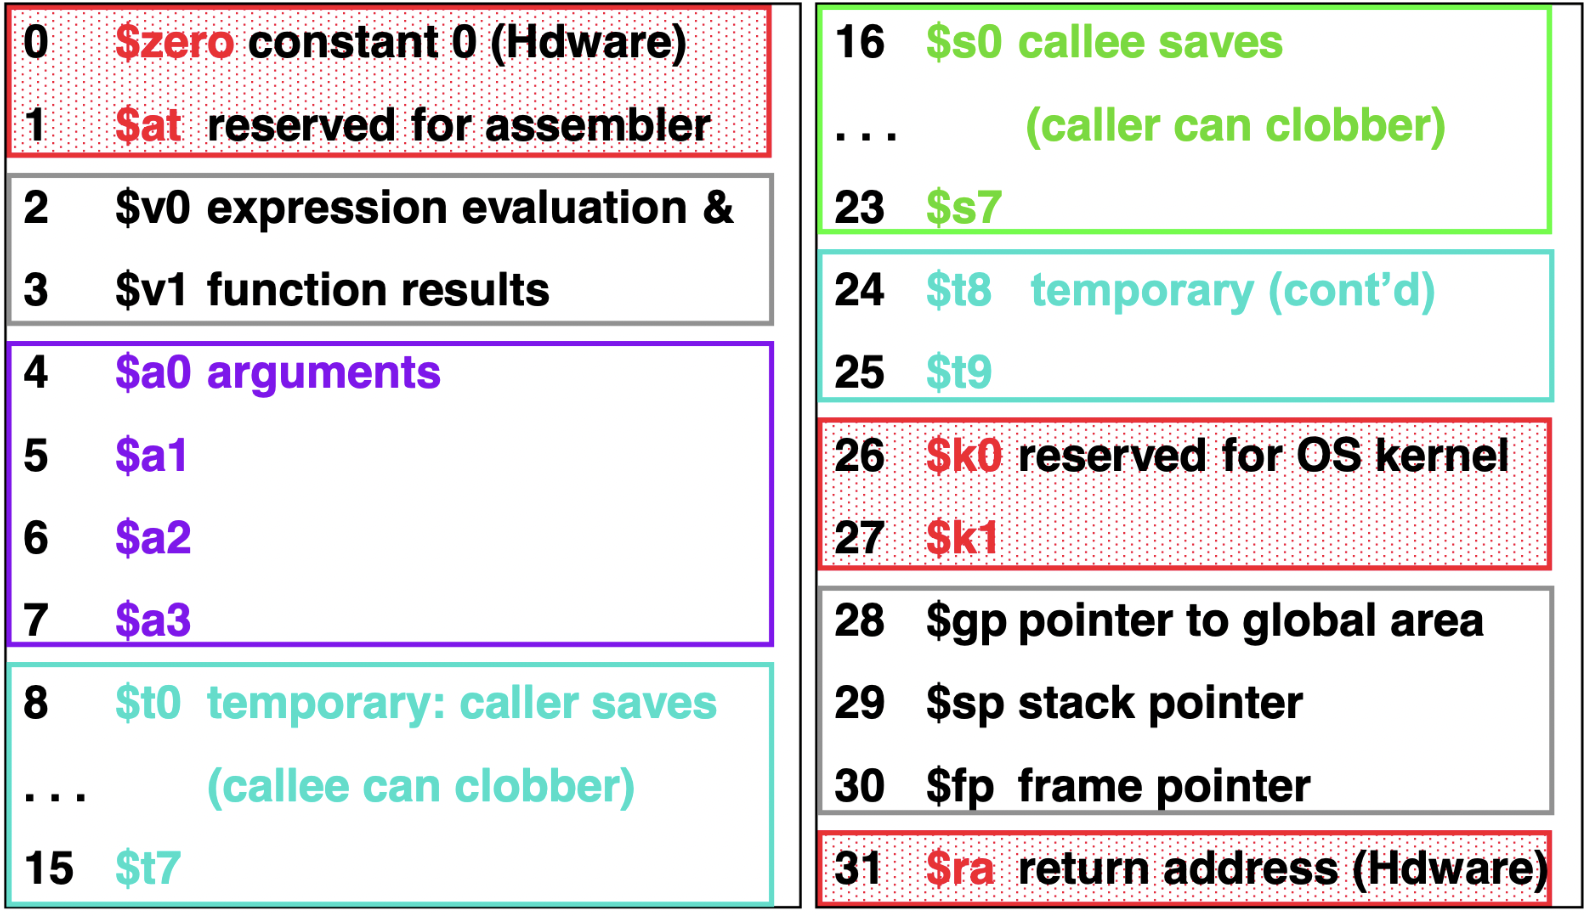

##MIPS ARITHMETIC INSTRUCTIONS

* MIPS Assembly language arithmetic statement
  ```
  add $t0, $s1, $s2

  sub $t0, $s1, $s2

  ```
Each arithmetic instruction specifies exactly THREE operands

  ```operand  destination  source1  source2```



**Register Operand Example:**
```
C code:

  f = (g + h) - (i + j);
    f, ..., j in $s0 ... $s4

  Compiles MIPS code:

  add $t0, $s1, $s2
  
  add $t1, $s3, $s4
  
  sub $s0, $t0, $t1 

```

Here we are using:

7 registers, 3 instructions, 3 cycles, 

$CPI = \frac{3}{3} = 1$

We can optimize the number of registers:

```
f = (((g+h) - i) - j);
    f, ..., j in $s0 ... $s4

add $s0, $s1, $s2

sub $s0, $s0, $s3

sub $s0, $s0, $s4
```
Now we are using:

5 registers, 3 instructions, 3 cycles

$CPI = \frac{3}{3} = 1$

The first implementation is parallelizable (both adds can be done at the same time)

while the second implementation (with two subs) cannot be parallelizable at all


IDEAL CPI with parallelization:

>$\frac{1}{n}$ where n is the number of cores in the CPU 


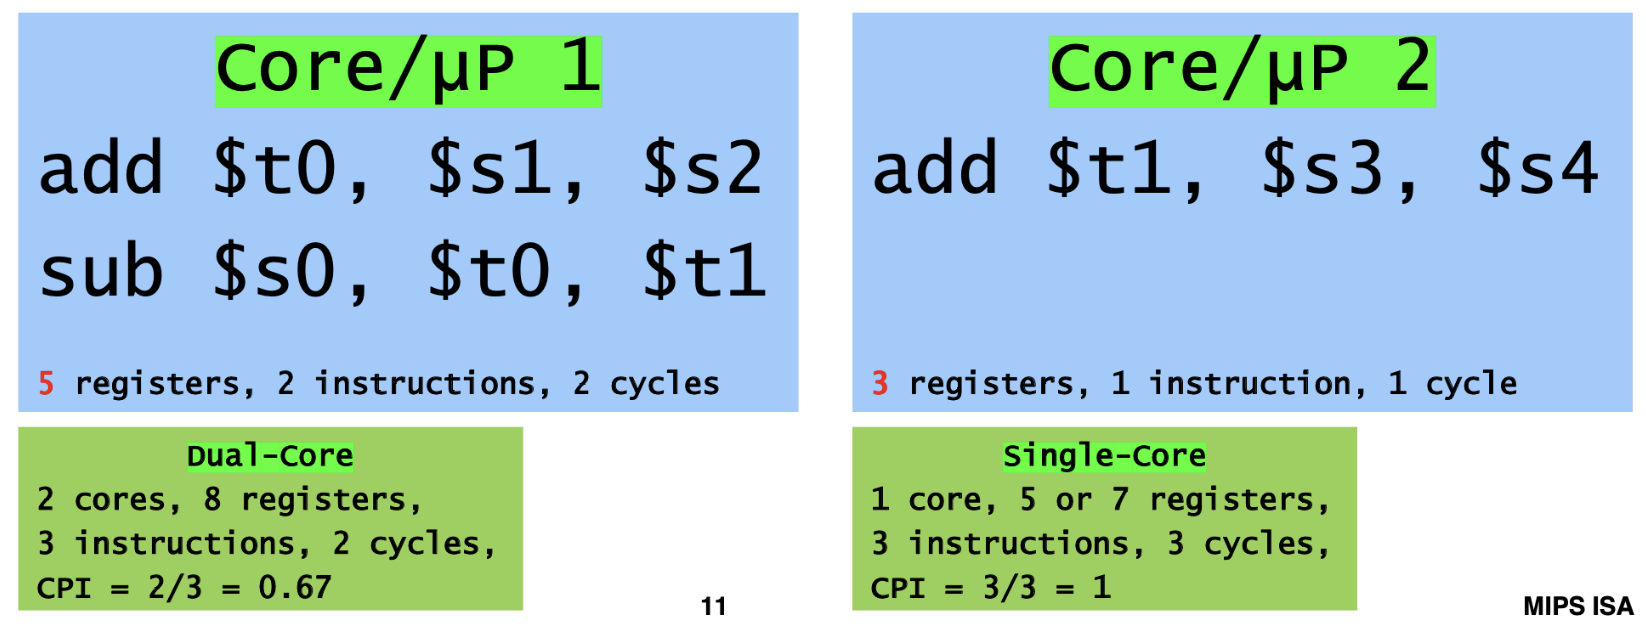






Notice that the dual-core implementation uses 8 registers: 
  - that is because $t1 is Core 1 is a different register than $t1 in core 2

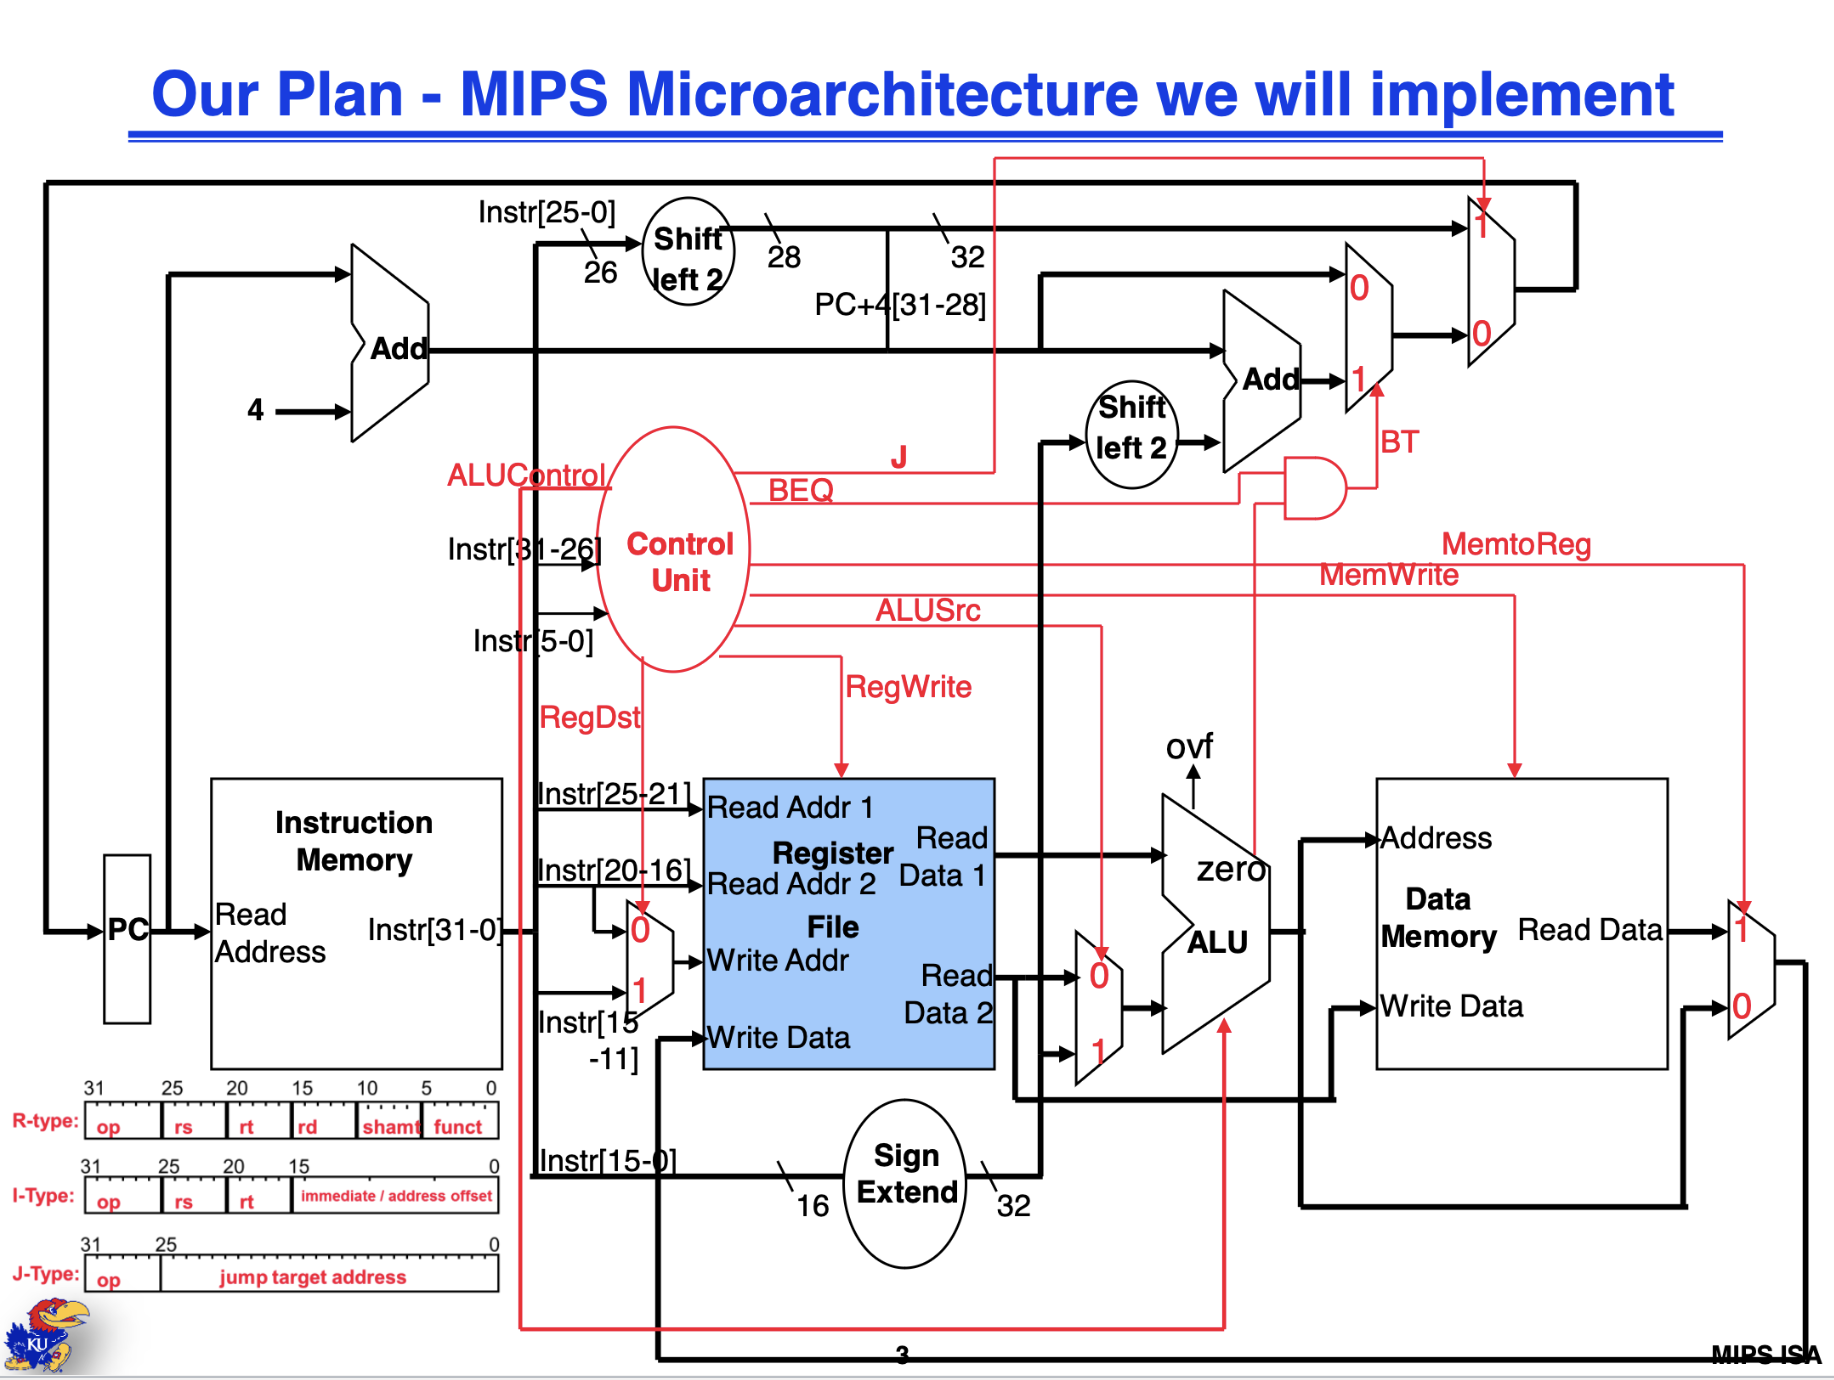

#<center>**Register File:**

- Operands of arithmetic instruction must be from a limited lumber of special locations contained in the datapath's register file
  * Thirty-two Registers
    - 2 read ports 
    - 1 write ports 

depth is 32 locations 
width is 32-bits 

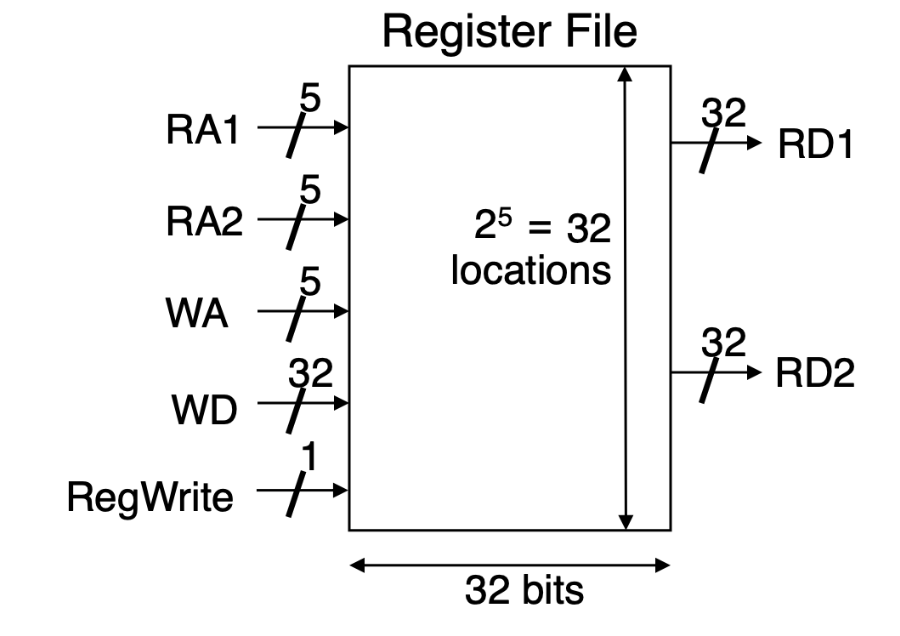

**In the above Diagram**

RA = Read Address 
RD = Read Data 

WA = Write Address
WD = Write Data

RegWrite = enable write 
  - needed for write but not read to guard against accidentally overwriting data



##<center>**Register File - Specifications:**

* Fast

  * smaller is faster, make the common case fast 

* Easy for a compiler to use 

* Improves code density



**FOR HOMEWORK 3, NEED 3 PROCESS STATEMENTS, AND THEN DESCRIBE THEM BEHAVIORALLY**

    FOR READ OUTPUT
    RD1 <= reg_file(UNSIGNED(RA1))

```
  FOR write 

  if (regWrite = '1') then 

    regfile(WA) <= WD;
```

##<center>**The Constant Zero:**

* MIPS register 0 ($0) is the constant 0
  * CANNOT (should not) be overwritten

* useful for common operations
  * initialize registers

    *add $t2, $zero, $zero*
  
  * Move between registers
  
    *add $t2, $s1, $zero*

- Small constants are used quire frequently
  - 50% of operands in many common programs
    A = A + 5;
    B = B + 1;
    C = C - 18;

Possible solutions (not good solutions)
  - hard-wired registers like $0
  - put "typical constants" in memory 

Solution:
  - allow immediate values in the operands of instructions
  
* Include constants INSIDE arithmetic instructions
  * must faster than if they have to be loaded from memory
  * constants come in from memory WITH the instruction

* MIPS immediate instructions:
```c
addi $s4, $s3, 4     // R[$s4] = R[$s3] + 4
```

There is no *subi* instruction, because a signed number can be used with addi to represent a subtraction


2's Complement Signed Integers:

Some specific numbers:

zero: 000...000

-1  : 111...111

Most positive: 0111...111

Most negative: 1000...000
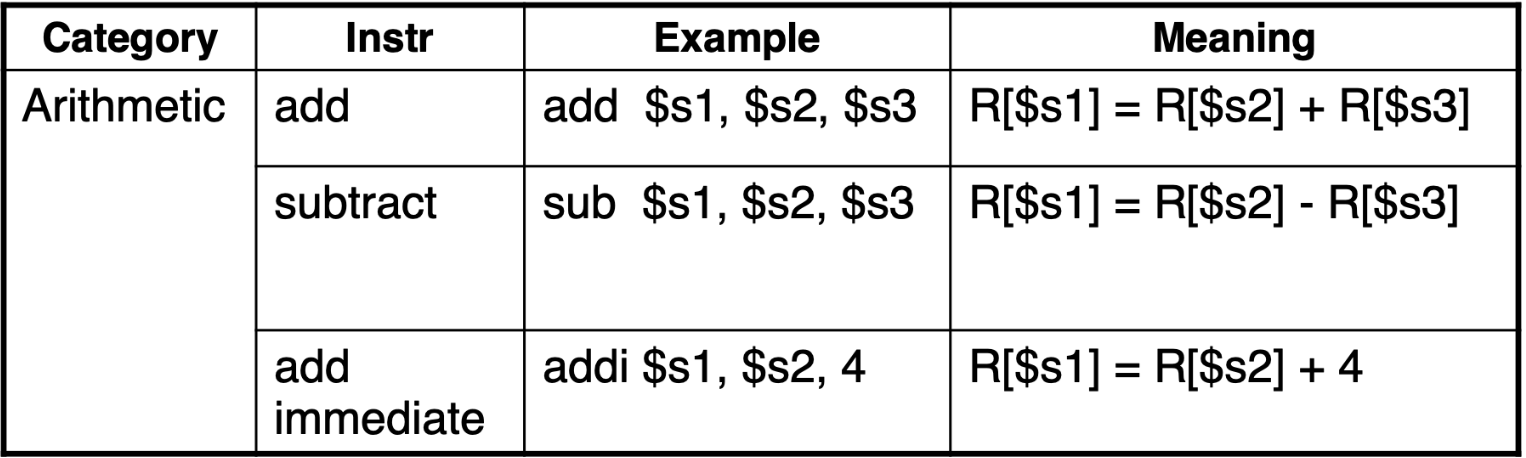

##<center>**Sign Extension:**

* Representing a number using more bits than it currently has
  * Preserve the numeric value

* In MIPS instruction set
  * addi: extend immediate value

* Replicate the sign bit to the left
  * c.f. unsigned values: extend with 0s

* Example:
  - +2: 0000 0010 => 0000 0000 0000 0010
  - -2: 1111 1101 + 1 => 1111 1111 1111 1110

##<center>**Processor - Memory Interconnections:**

* Memory is a large, single-dimensional array
* An Address acts as the index into the memory array 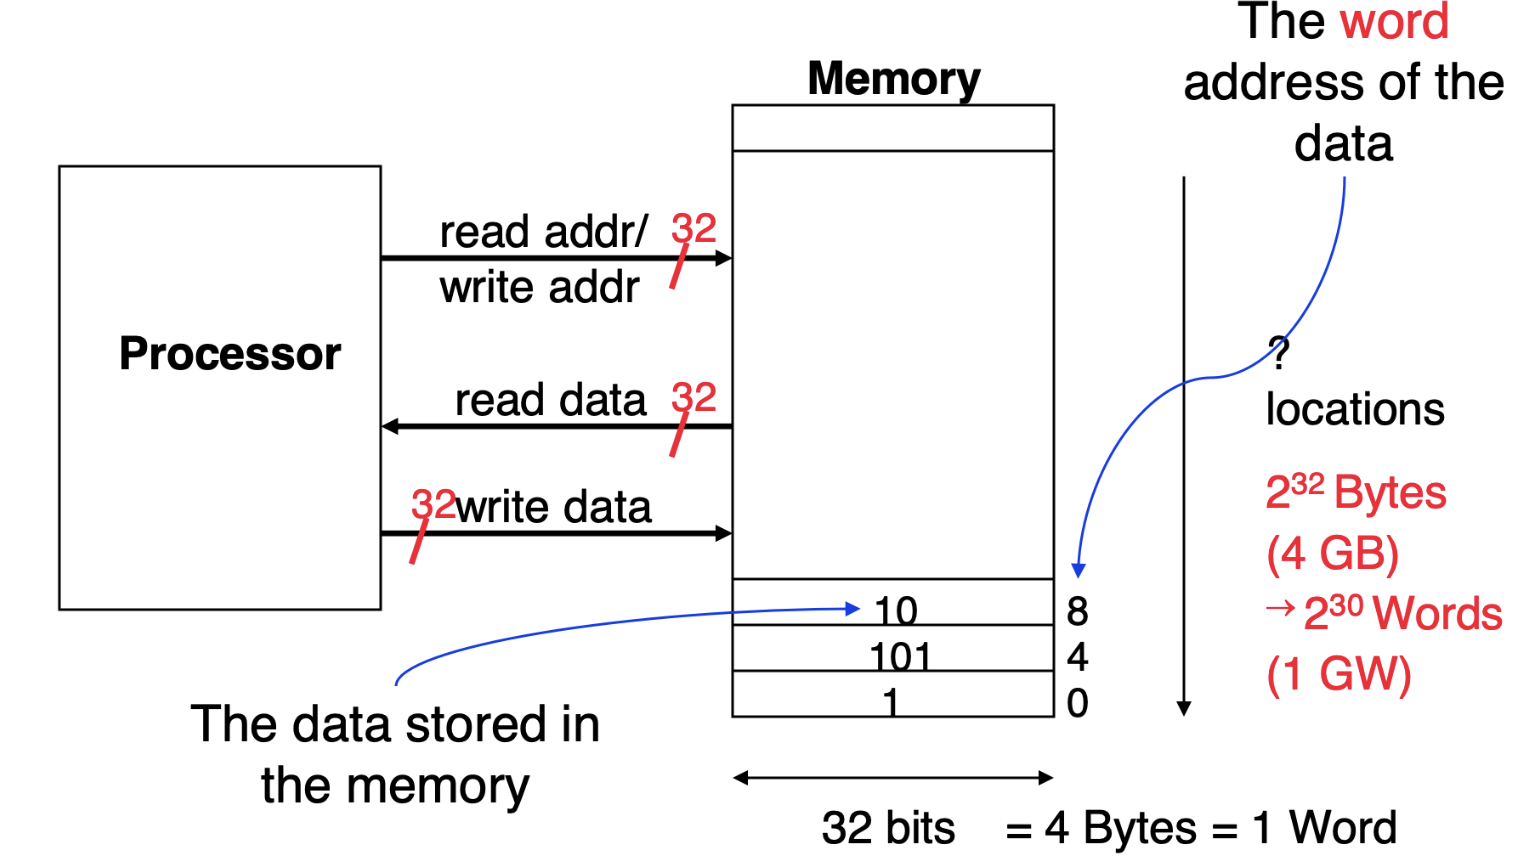

##above diagram
The above diagram describes SINGLE PORTED MEMORY, there is only ONE shared address line

- Next lab will implement sigle-ported memory for RAM of processor

Memory should be byte addressable 
> 32 bits = 4 bytes = 1 word, so word address increments by 4s 
>> 32bit address line can address 4GB 
>> 
>> 32 bit address line can address 1GW 

##<center>**MIPS Data Memory - Specification & Architecture**

M 32-bit registers
  * One Read Port
  * One Write port

  * One shared address port

##<center>**MIPS Instruction Memory:**

M 32-bit registers
  * One read port 
  * ZERO write ports -> ROM (Read Only Memory)





RESET for Instruction Memory loads my_program into the intr_mem 

sensitivity list - rst, address 
```  
  if rst = '1'

    load my_program to intr_mem
  
  else
  
    run the program 
```

##<center>**Memory Operands**
**<center>The MIPS ISA: Load and Store</center>**

* main memory used for composite data
  * Store result from register to memory 
* Memory is Byte addressed
  * Each address identifies and 8-bit byte
* Words are aligned in memory
  * Word address must be a multiple of 4
MIPS is Big Endian
  * Most-significant byte is stored in the lower-index

##<center>**Accessing Memory**

* MIPS has two basic *data transfer* instructions for accessing memory

```
lw $t0, 4( $s3 ) # load word from memory
  // 4 is the offset from the base address, $s3

sw $t0, 8( $s3 ) # store word from memory 
  // 8 is the offset from base address, $s3
```

##**MIPS memory addressing:**

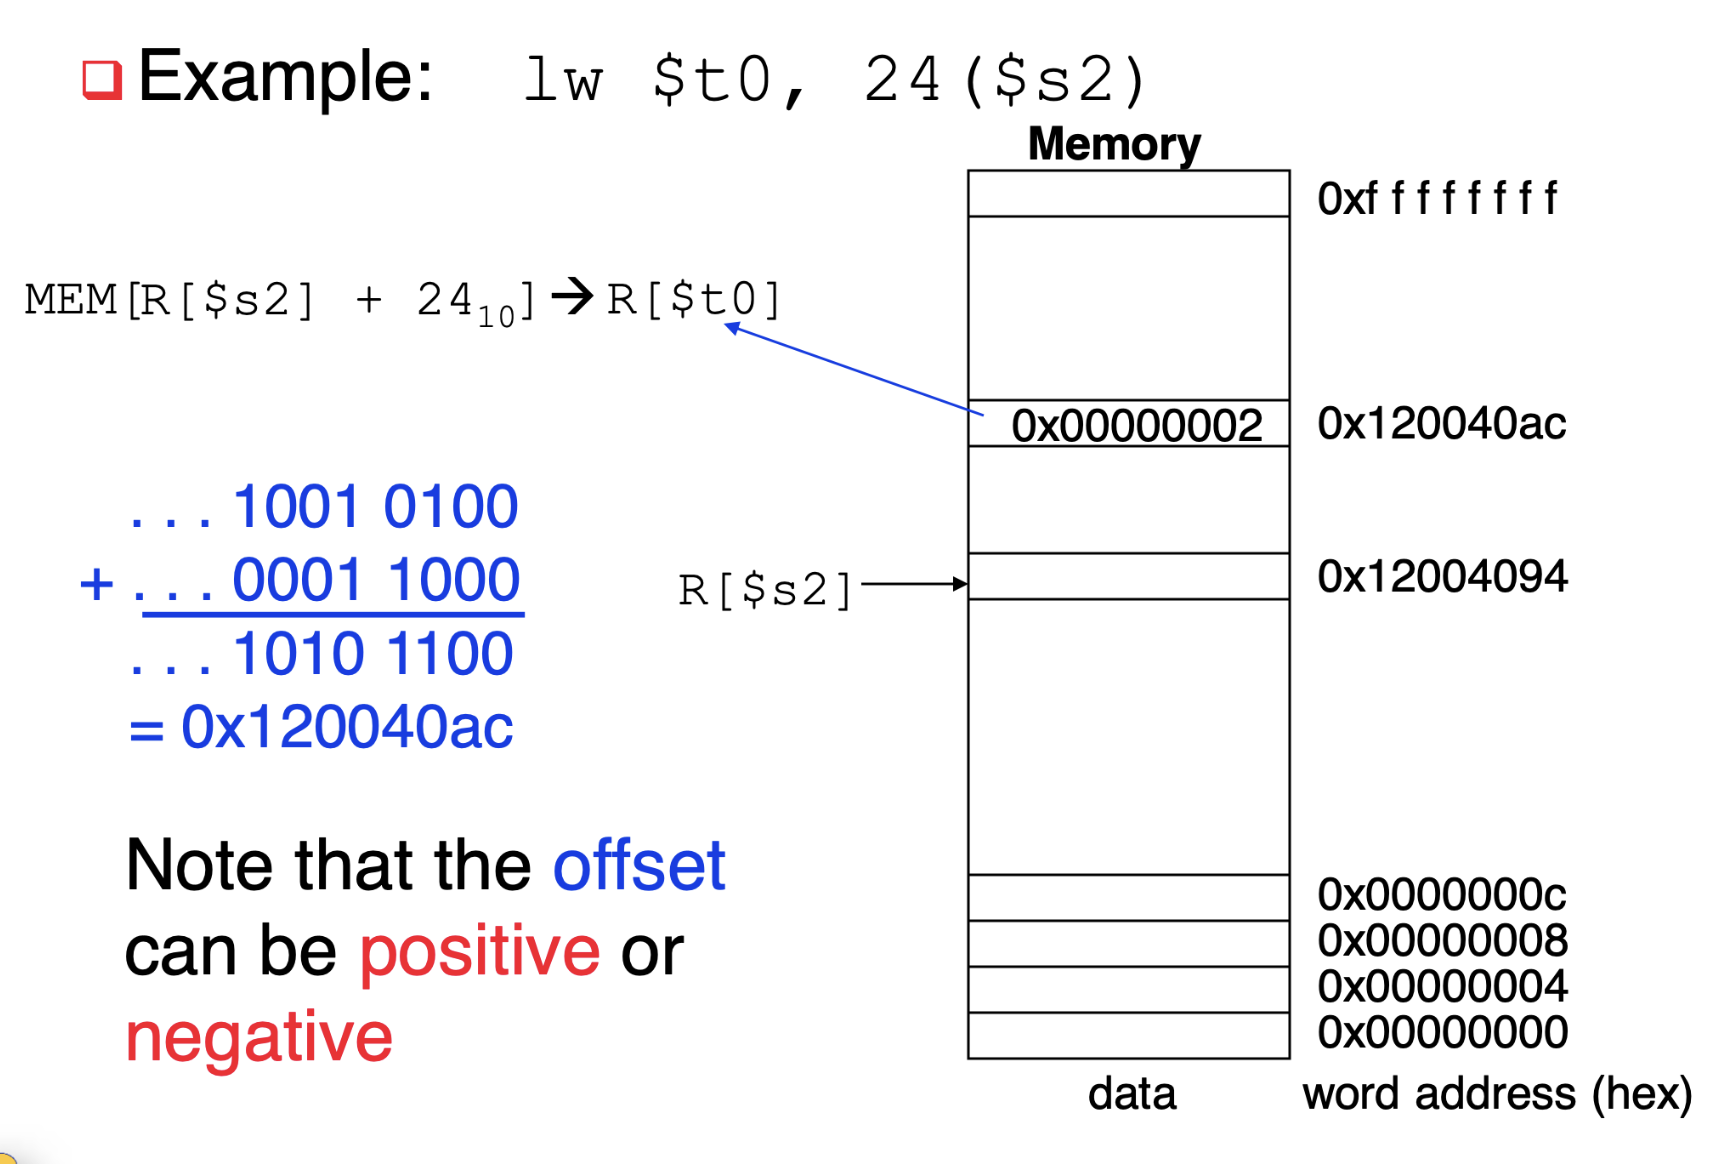

##<center>**Compiling Loads and Stores:**

* Assuming that
  * variables b is stored in register $s1
  * base address of array A is in register $s4

* What is the MIPS assembly code for the C statement:

>>```c
A[8] = A[2] - b
```
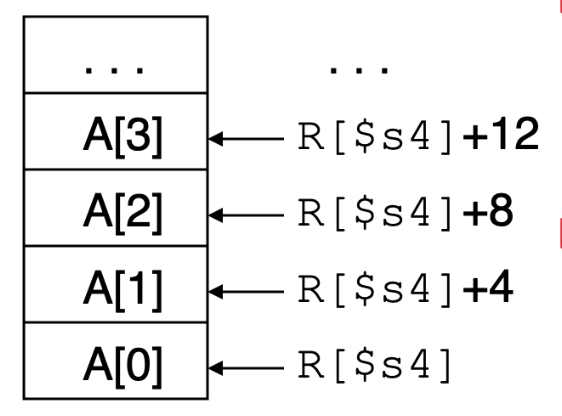

##<center>**Compiling Loads and Stores:**

```
lw    $t0, 8( $s4 )

sub   $t0, $t0, $s1

sw    $t0, 32( $s4 )
```

##<center>**Compiling with a Variable Array Index**

* Assuming that 
  * Variables b, c, and i are stored in registers $s1, $s2, and $s3 respectively

* What is the MIPS assembly code for the C statement:
```c
add $t1, $s3, $s3  # array index is in $s3
add $t1, $t1, $t1  # temp reg $t1 holds 4 * 1
add $t1, $t1, $s4  # addr of A[i] now in $t1
lw $t0, $t1, $t4   # content of A[i] now in $t0
sub $s2, $t0, $s1
```

#<center>**MIPS ALU: Specification & Interface**

ALU used for
  * R-type: ALU function depends on *funct field*
  * Load/Sotre: ALU Function = add 
  * Branch: ALU Function = subtract

Operations/Functions
  * Up to 16 operations ( we will only implement only 6 )
  * Signed / Unsigned arithmetic ( we will implement only signed )

* Combinational circuit: 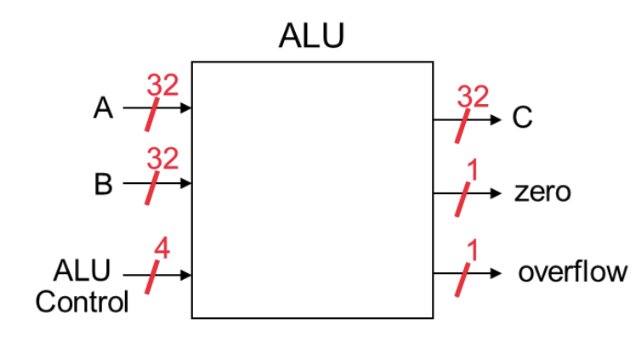


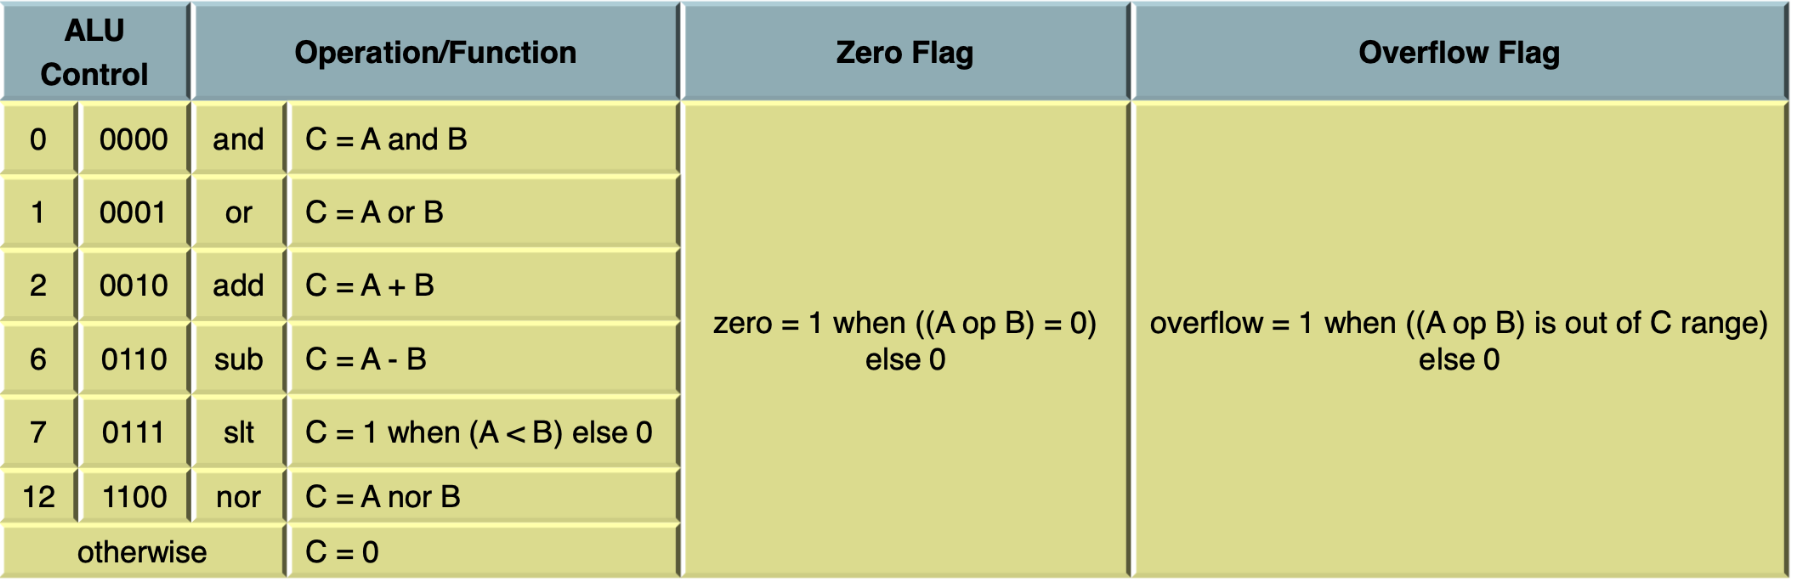

##<center>**overflow and signed bit representation**

Logical operations will never produce overflow 

Addition and Subtraction can generate overflow 

when adding two positive (signed) numbers, if the result has a 1 in the MSB, then overflow occurred 

similarly for negative numbers, when adding two negative numbers, if the result has a 0 in the MSB, then overflow occurred 


**Dynamic range**

$-2^{n-1} → +2^{n-1} - 1$

S_A, S_B, S_C = signed bits of A, B, C

$ovf = S̄_A * S̄_B * S_C + S_A * S_B * S̄_C$
> if the signed but of A and B are 0, and the signed bit of C is 1, then overflow
>
> if the signed bit of A and B are 1, and the signed bit of C is 0, then overflow


#<center>**MIPS R-Format Instructions:**

Instruction Fields:
  * op: operation code ( opcode - what operation to be executed )
  * rs: first source register number
  * rt: target ( second source ) register
  * rd: destination register number
  * shamt: shift amount ( 00000 for now )
  * funct: function code ( extends opcode )

  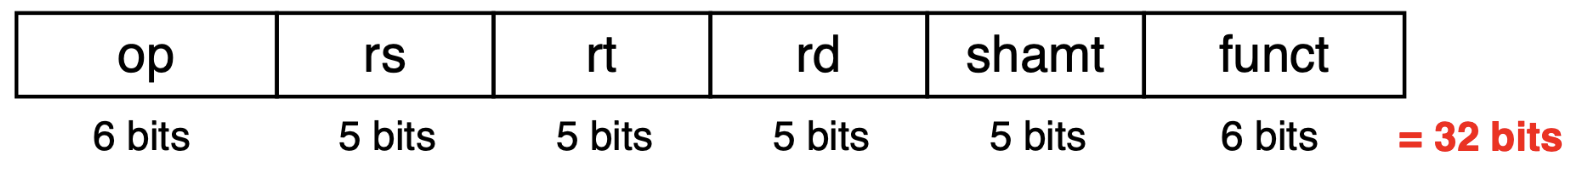

##**Practice using MIPS Reference Sheet BEFORE EXAM**

##<center>**R-Format Example:**

```
add $t0, $s1, $s2
```
after seeing this, go to the reference sheet and check format of add instruction
> add is R format
>> so it has 6 fields

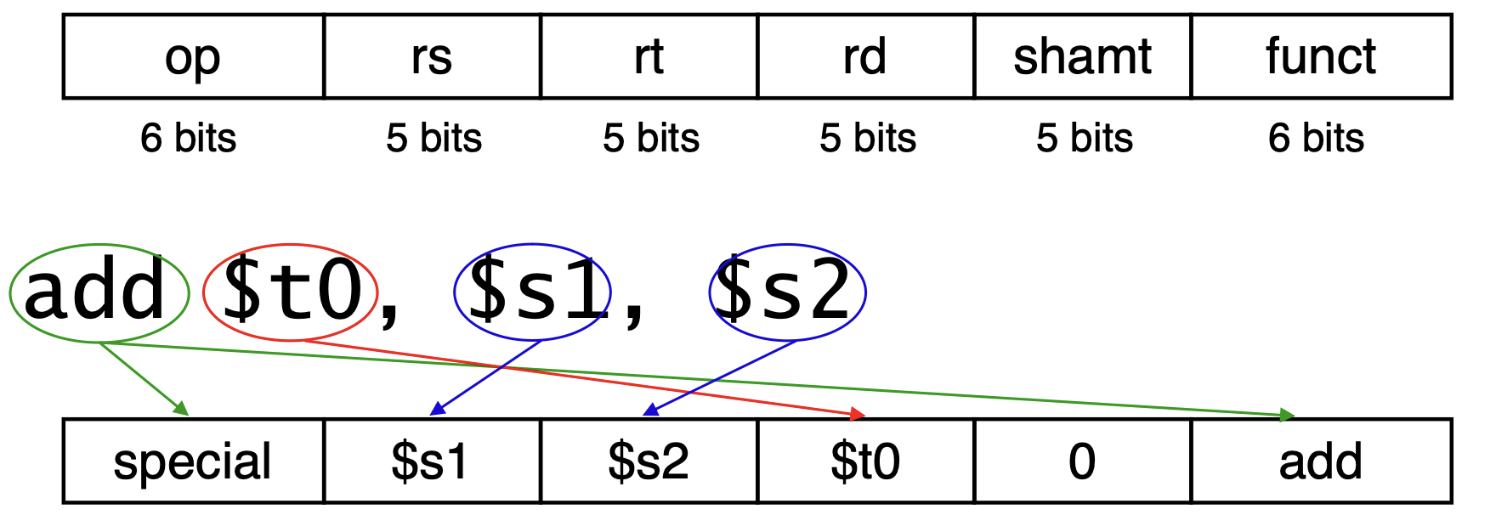


##<center>**R-Format Example Cont:**
above, ```$s1 = rs, $s2 = rt, $t0 = rd```

Now, for each field, get the binary form of the numerical values in those fields
> look at register file reference sheet 

``` $s1 = 17, $s2 = 18, $t0 = 8 ```
opcode for add is 0, and funct code is $(20)_{16} = 00100000$ BUT only 6 bits in funct field, so, code is actually 100000

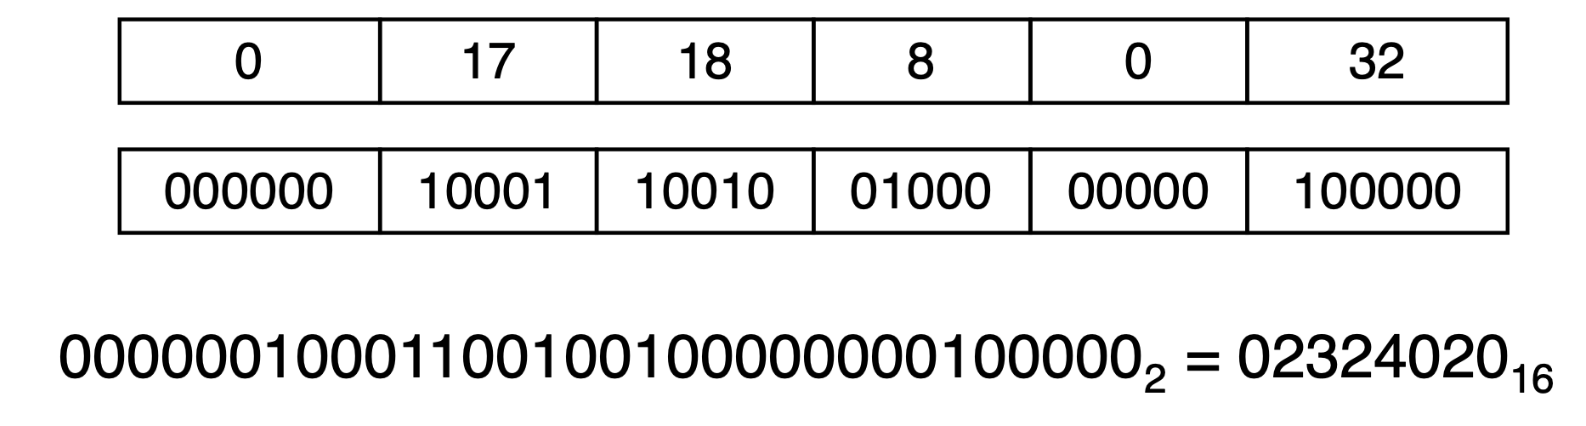

##<center>**MIPS I-format Instructions:**

* Immediate arithmetic and load/store instructions:
  * op: operation code ( opcode )
  * rs: first source register number
  * rt: target ( destination or second source ) register number
  * Constant: $-2^{15} → +2^{15} - 1$
  * Address: offset added to base address in rs

* Design Principle 4: Good design demands good compromises
  * different formats complicate decoding, but allow 32-bit instructions uniformly
  * Keep formats as similar as possible

  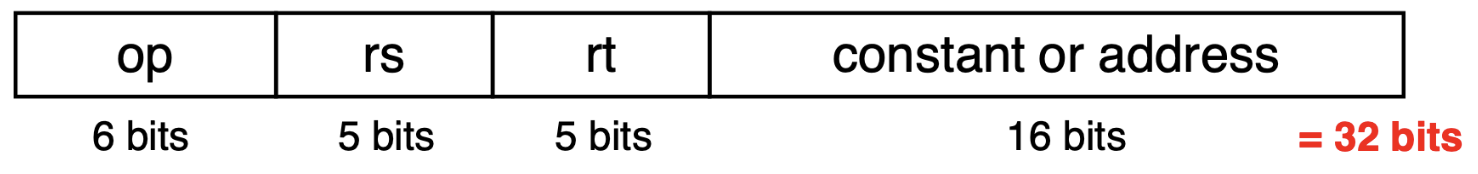

##<center>**The Compromise of I-format**

only 16 bits are available to disignate immediate values 
  * becasue these are signed integers, the range of constants is lower

>>$ -2^{15} → +2^{15} - 1 $

##<center>**I-format Example:**

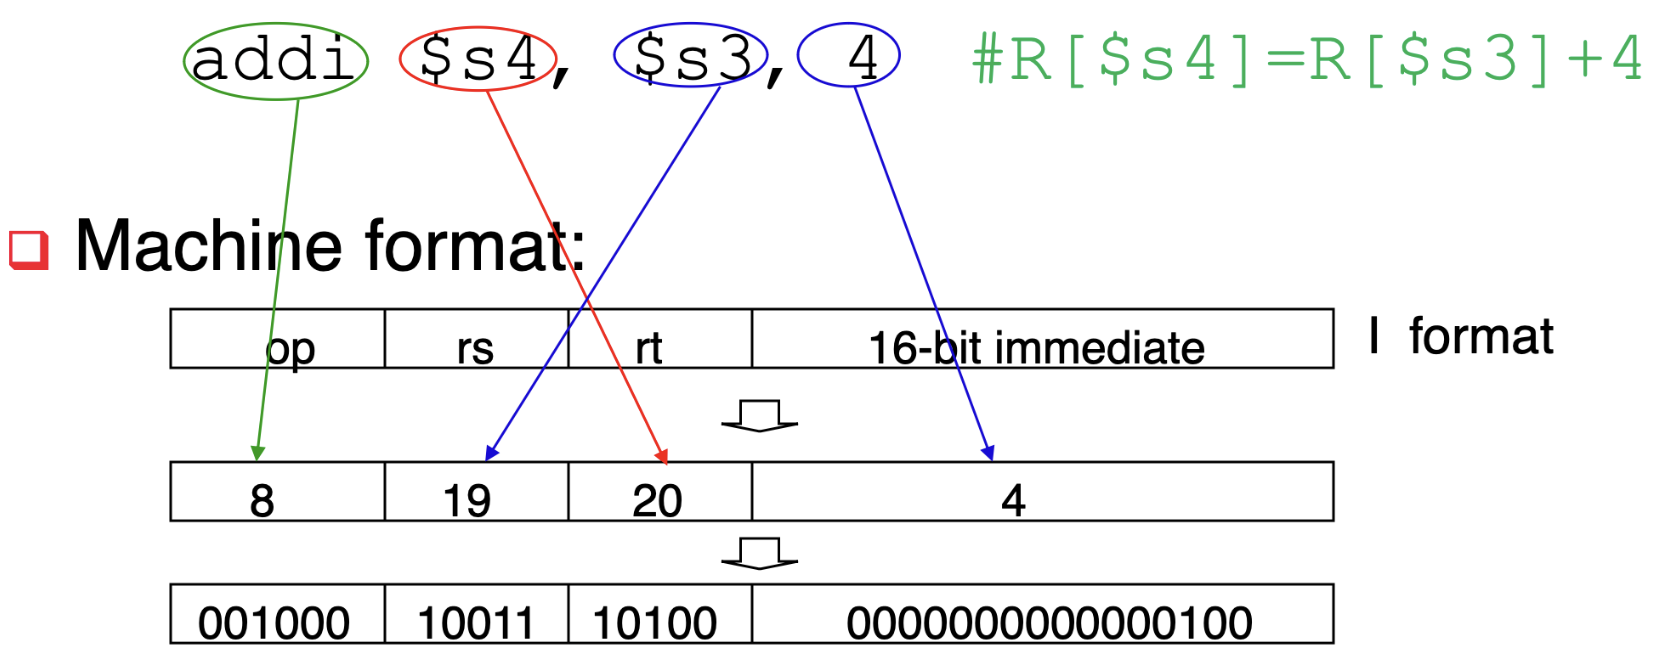

##<center>**Instruction Format Encoding:**

* each format has a distinct set of values in the *op field*

* can *reduce the complexity* with multiple formats by keeping them as similar as possible
  * *First three fields* are the same in R-type and I-type 

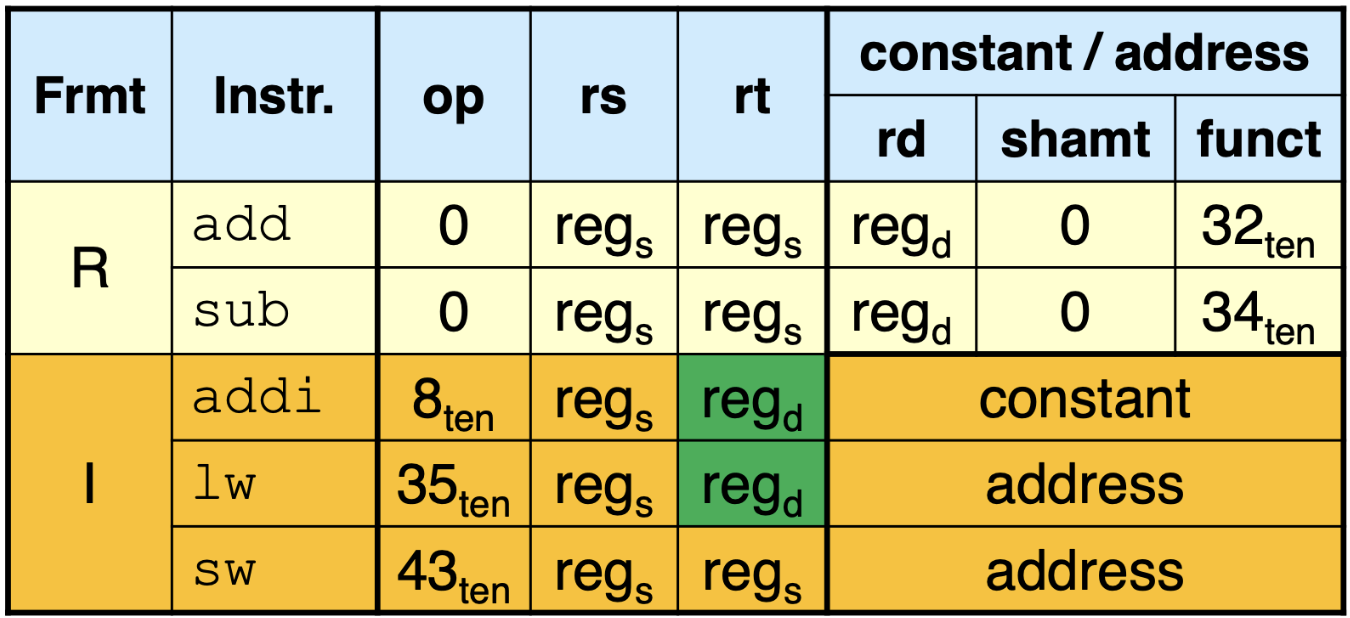

##<center> **Logical Operations:**

* Instructions for bitwise manipulation

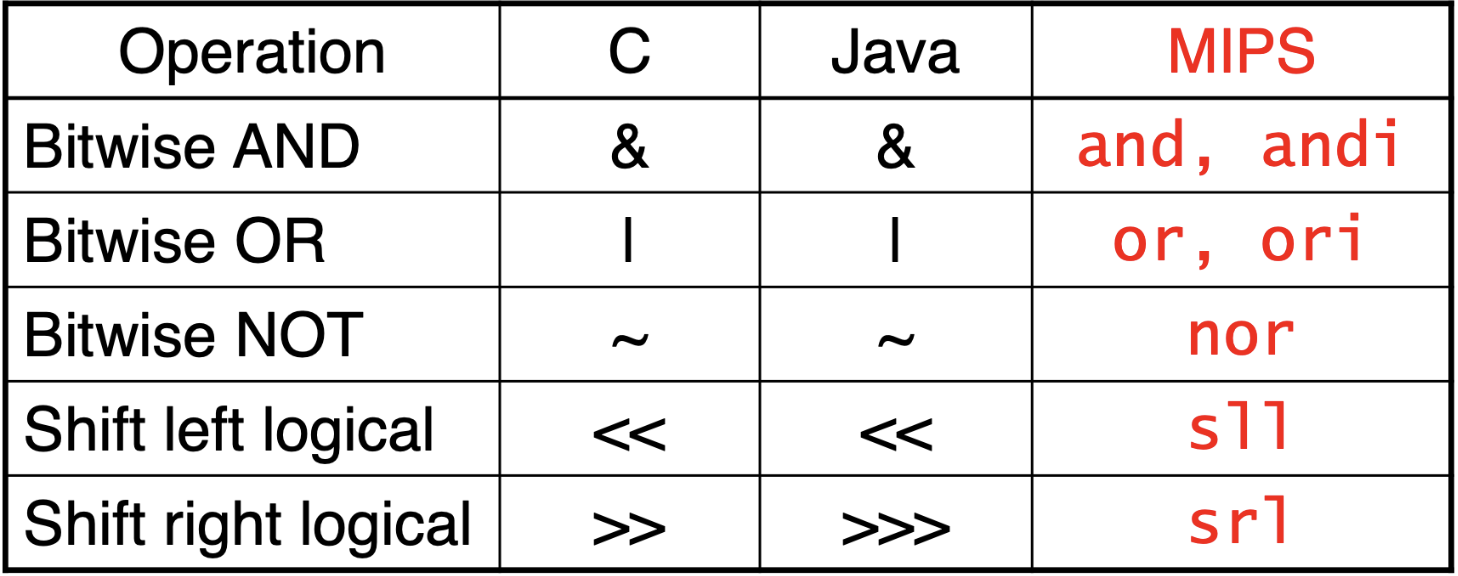

##<center>**AND operations:**

* useful to *mask bits* in a word 
  * select some bits, clear other to 0
  * set some bits to 0, and leave other unchanged

##<center>**OR operations**

##<center>**NOT operations**

##<center>**Shift Operations:**

* shamt: how many positions to shift
  * THESE ARE R-format,
    * R-format has a specific field for shift values 

* Shift left logical (arithmetic) ```sll $t2, $s0, 8 #R[$t2] = R[$s0] << (8 bits)```
  * shift left and fill with 0 bits
  * sll by i bits multiplies by $2^i$

* Shift Right logical ``` srl $t2, $s0, 8 #R[$t2] = R[$s0] >> (8 bits) ```
  * shift right and fill with 0 bits 
  * srl by i bits divides by $2^i$( unsigned )

* shift right arithmetic ``` sra $t2, $s0, 8 #R[$t2] = R[$s0] >>> (8 bits) ```
  * maintains arithmetic correctness 
  * shift right and fill with sign-bit
  * sra by i bits divides by $2^i$ ( signed )


REMEMBER: the registers are 32 bits, and the shamt field is 5 bits 
  * with 5 bits, 0-31 bits can be shifted 
    * if we try to shift > 31 bits, it doesn't matter because at a shift of 31 
      bits, the whole register is cleared 

##<center>**Instructions for Making Decisions:**

* Decision making instructions
  * alter the control flow
  * i.e. change the "next" instruction to be executed 

jumps - unconditional branches

branch - conditional branches

* MIPS *conditional branches* instructions:

  ```beq $s0, $s1, Lbl #go to Lbl if R[$s0] == R[$s1]```
  
  ```bne $s0, $s1, Lbl #go to Lbl if R[$s0] != R[$s1]```

    * **Labels are nothing but addresses in Instruction Memory**


**Example:**

```if ( i == j ) h = i + j;```
* ```i, j, h in $s0, $s1, $s3```

``` beq $s0, $s1, Lbl

BUT THIS IS NOT RIGHT

Lbl add $s3, $s0, $s1
```

CORRECT:
  invert the condition 

```
bne $s0, $s1, Lbl
add $s3, $s0, $s1
Lbl ... 
```

look at conditions, invert the condition, run desired code when (invert logic) NOT true, then Label after, so that the desired instruction is only jumped when inverted logic is TRUE (the original logic is FALSE)


##<center>**Assembling Branches:**

*Instructions:
  * ```
       beq $s0, $s1, Lbl
       bne $s0, $s1, Lbl
    ```


* How is the branch destination address specified?
  * as a relative branch (branch offset)
    * offset from PC

**Specifying Branch Destination:**

* instead of putting the PC offset in terms of the address ( 4 represents a single address offset), we put 1, and then PC can do its own multiplication. by putting 4 ( 0100), then we are losing 2 bits from the 16 bit field effectively making it a 14 bit range instead of 16 

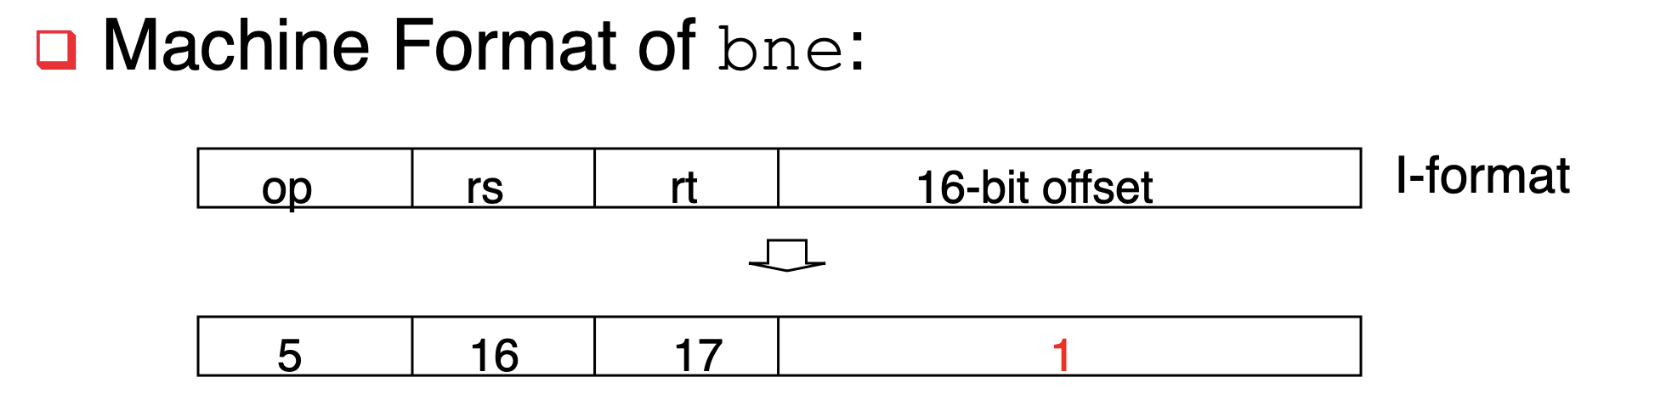

##<center>**Another Instruction for changing Flow:**

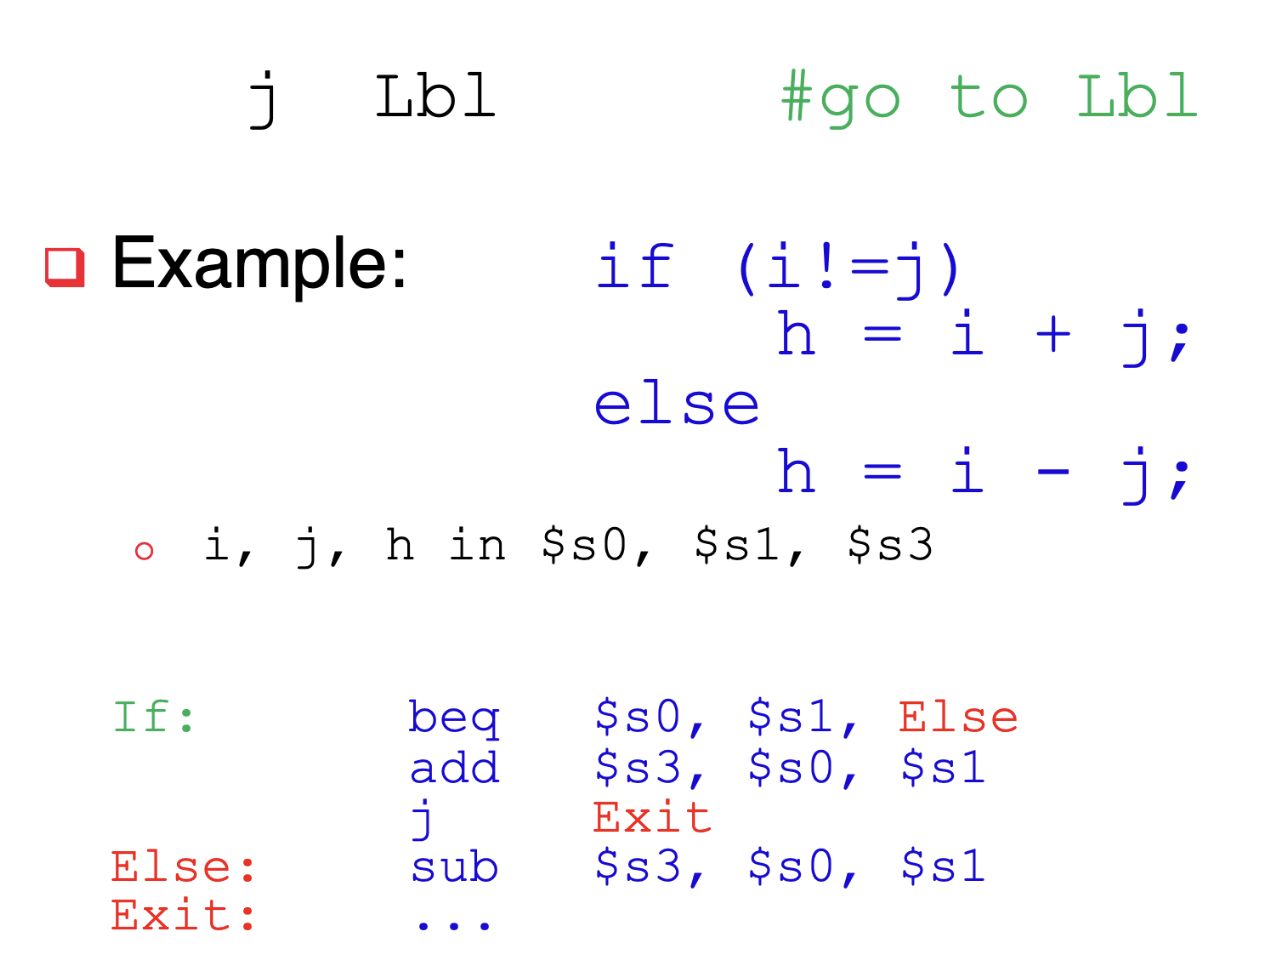

## Unconditional Jump 

``` j Exit ``` is the unconditional jump instruction

##<center>**Assembling Jumps:**

Instruction:

  * ```j Lbl #go to Lbl```

Machine Format ( New format -> J-format )

[ op | 26-bit address ]

[ 2 | ???? ]



#<center>**Midterm Update:**

**Midterm on Friday 3/10**

- Wednesday will be review Session


best questions to study are those present in the lecture slides 
**HOMEWORK** 2 material

4 questions:
  1. amdahl's law
  2. assembly
  3. parallelization speedup
  4. given code in assembly, give information about that assembly code

cheat sheet is **ALLOWED**, single-sheet double sided, letter size (8 1/2" by 11" )

*Write some questions to ask during class on Wed. for Midterm Review*



**I'd bet cash money that we will have to assemble and then compile a while loop**


#<center>**Midterm Review:**

BIG study HW 2, 


Expect 4 Questions:
  1. compiling and assembling high level code 
    * Most likely a loop statement
    * probably the most time consuming question
  2. HW 2 problems
    * ahmdal's law, speedup 
  3. parallelization/sequential 
  4. analyze a snippit of code for how many times memory/registers accessed



CONTENT AFTER HERE ARE NOT GOING TO BE ON THE MIDTERM

##<center>**Branching far Away:**

* what if the branch destination is further away than can be captured in 16 bits?
  * Conditional branches have 16-bit address field


```
If : beq $s0, $s1, L1 
```

We need to use a conditional branch to go to a nonconditional jump instruction (which has a 26-bit address field 

IN order to implement this, we need to invert the logic of the statement


```
If : bne $s0, $s1, L2   #when the original condition is not true, we want to skip the jump 
  j L1
L2: ...
    ...
    ...
...
...
L1: 
```

*Multi-Hops*
  * Invert the condition and insert and unconditional branch 
    * originally this was done manually
    * now, assemblers are able to account for this automatically

  * if we need to branch out of the range of 26 bits then we have to jump to a jump instruction

##<center>**Branch Instruction Design**

Why not blt, bge, etc??

equal and not equal take the same level complexity and are faster than < and > 

Example: 
  the inputs of A > B can be reordered to B > A to compute if A < B 

* We have bne and beq in MIPS but not blt or bge
  * blt and bge are considered pseudo instructions 
    * they are replaced by assembler with multiple basic instructions

* Hardware (comparators) for <, <=, ... are SLOWER than =, !=
* combining comparators with branch involves more work

SO, we design one instruction to be penalized instead of penalizing the performance of all comparator operations 

##<center>**slt**

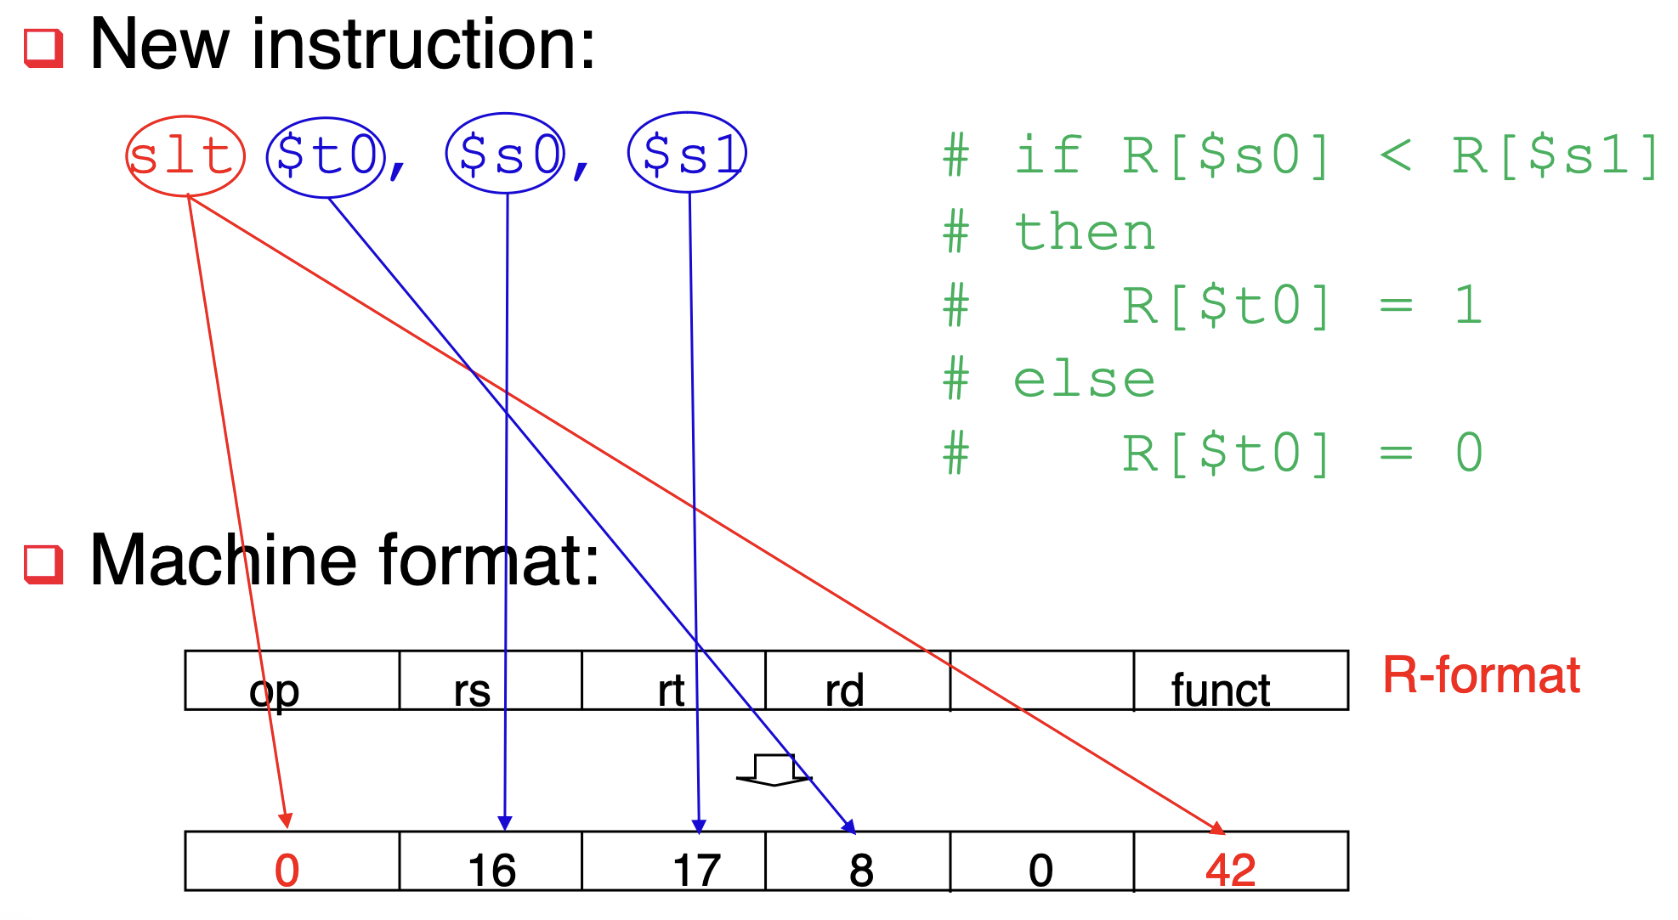

##slt

There is also slti comparing to an immediate value (i-type)

as well as sltu for unsigned 

##<center>**Other Branch Instructions:**

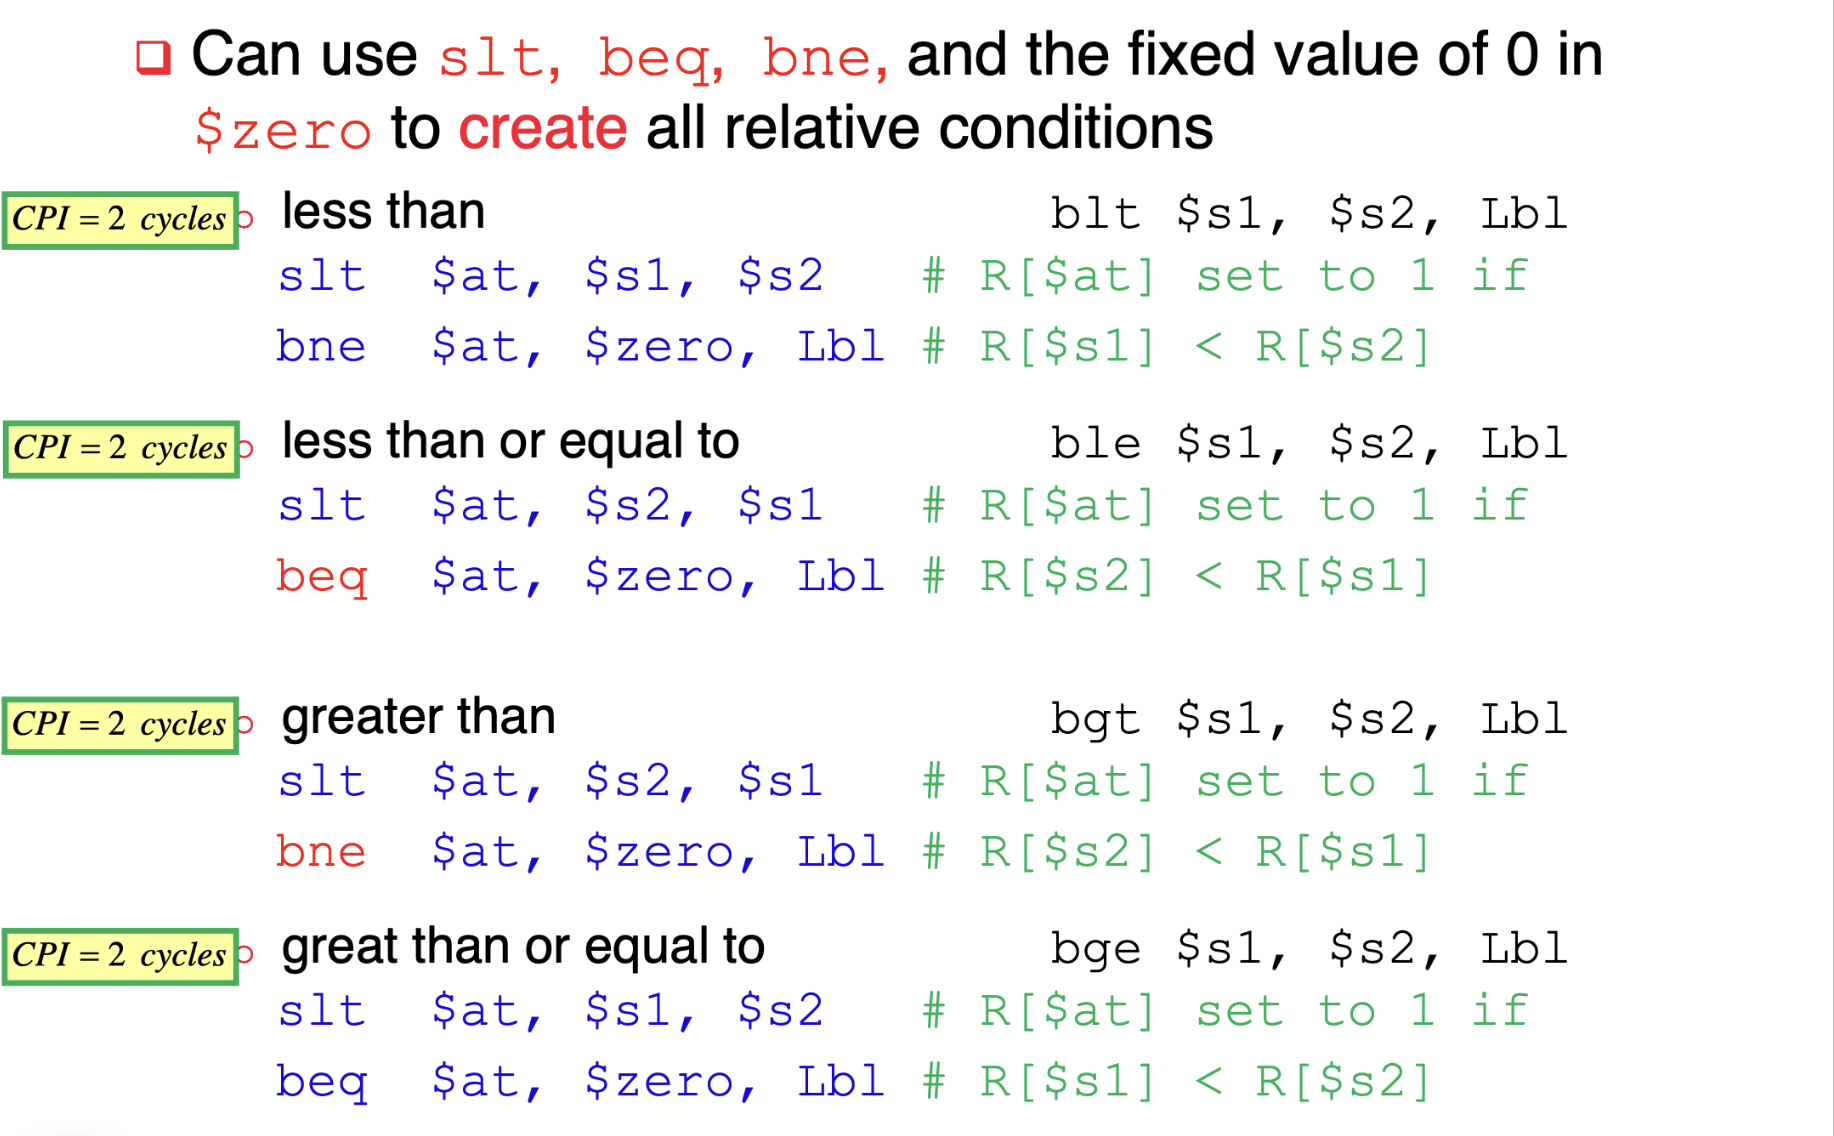